In [64]:
import requests
import pandas as pd
import numpy as np
import csv
import datetime as dt
import matplotlib.pyplot as plt


# url="https://api.binance.com/api/v3/exchangeInfo"


def get_binance_2_csv(symbol,interval,api_key,api_secret):

  url = f'https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}'


    # Добавьте заголовки для запроса API
  headers={
      'X-MBX-APIKEY': f'{api_key}'
          }

  #sende request by Api and geeting data in json 
  response = requests.get(url, headers=headers)
  data = response.json()
  print(data)

  #creating file in csv format , name contains the symble and the interval

  filename = f'{symbol}_{interval}.csv'

  with open(filename, 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      
      # Write the column headers to a file
      writer.writerow(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
      
      # Write the quotation data to a file
      for row in data:
          writer.writerow(row)



#Api key and secret form the binance account
api_key = '2plFuzqwhwilH28UsGaowvfyeuNj4n4vJLE6DxvYnFJHknNcLU5e6F5Jk7BgJaEF'
api_secret = 'zA4JD1CIbOiZrn0Dv9IzUD0NKGSZxlGq3Goex2MhvQiCFrtik2KkzO7P27b0F4Z6'


# speicfy the symbol and the interval 
symbol = 'BTCUSDT'
interval = '1h'



get_binance_2_csv(symbol,interval,api_key,api_secret)





{'code': 0, 'msg': "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."}


#No Access to Binance 
##"Service unavailable from a restricted location according to 'b. Eligibility'
there is no access to binance data in Russia , the code that has been written above can read the data from binance for any symbole and any time interval , justt depend on the paramets that u apss to the function that data will be saved in CSV file that contain the quote data cnadelstiks information , the name of CSV file will denote to the symbol and to the interval used
in the next cell we gonna load CSV file that contain all inforamtion about candelstick of BTCUSD since 2017-08-19 to 2023-04-07  

                    Unix   Symbol      Open      High       Low     Close  \
Date                                                                        
2023-04-07  1.680830e+12  BTCUSDT  28033.83  28100.00  27766.94  27906.33   
2023-04-06  1.680740e+12  BTCUSDT  28170.01  28182.05  27711.00  28033.82   
2023-04-05  1.680650e+12  BTCUSDT  28165.47  28775.00  27805.10  28170.01   
2023-04-04  1.680570e+12  BTCUSDT  27800.00  28444.44  27662.79  28165.47   
2023-04-03  1.680480e+12  BTCUSDT  28171.87  28500.99  27200.24  27800.00   
...                  ...      ...       ...       ...       ...       ...   
2017-08-21  1.503270e+12  BTCUSDT   4069.13   4119.62   3911.79   4016.00   
2017-08-20  1.503190e+12  BTCUSDT   4120.98   4211.08   4032.62   4086.29   
2017-08-19  1.503100e+12  BTCUSDT   4108.37   4184.69   3850.00   4139.98   
2017-08-18  1.503010e+12  BTCUSDT   4285.08   4371.52   3938.77   4108.37   
2017-08-17  1.502930e+12  BTCUSDT   4261.48   4485.39   4200.74   4285.08   

<ipython-input-65-10e3dda854e0>:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  bitcoin.loc['2017':'2023','Close'].plot()


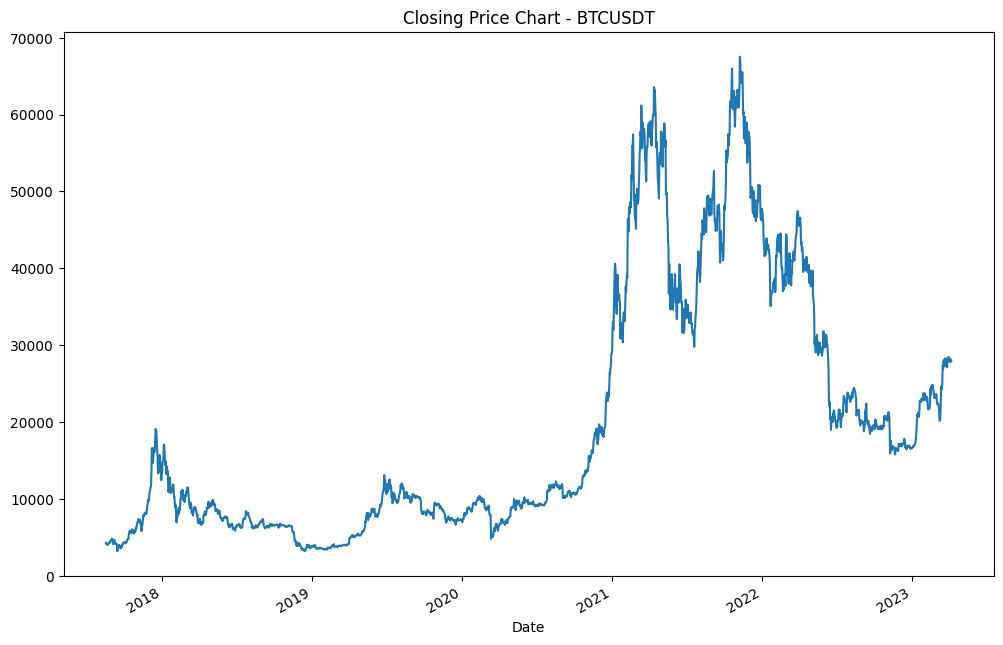

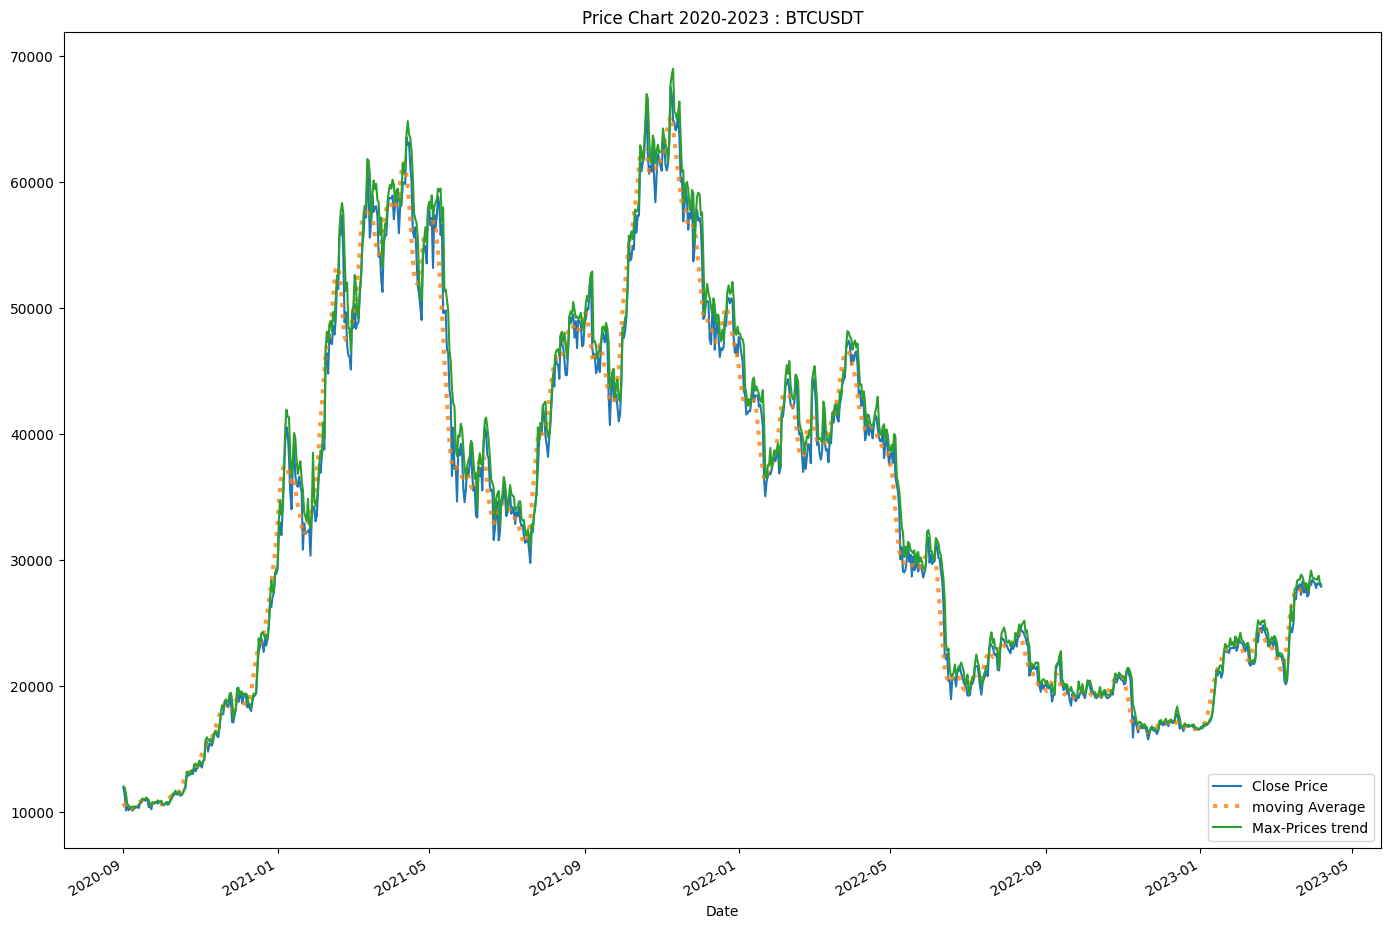

In [65]:
bitcoin=pd.read_csv("/content/Binance_BTCUSDT_d.csv",index_col='Date',parse_dates=True)
print(bitcoin)
k=['Open'  ,  'High'   ,   'Low' ,   'Close']
plt.figure(figsize=(12,8))
plt.title("Closing Price Chart - BTCUSDT")
bitcoin.loc['2017':'2023','Close'].plot()
plt.show()

plt.figure(figsize=(17,12))
bitcoin.loc['2020-09':'2023','Close'].plot()
bitcoin.loc['2020-09':'2023',k].mean(axis=1).rolling(window=7).mean().plot(label='moving average',lw=3,ls=':',alpha=0.8)
bitcoin.loc['2020-09':'2023',k].max(axis=1).plot()
# bitcoin.loc['2020-09':'2023',k].rolling(window=7).mean().plot(label='moving average',lw=3,ls='-',alpha=0.8)
# bitcoin.loc['2020-09':'2023',k].rolling(window=7,center=True).min().plot(label='moving average',lw=3,ls=':',alpha=0.8)
# for i in np.arange(0.2,1,0.2):
#     bitcoin.loc['2019-09','Close'].ewm(alpha=i).mean().plot(label=f'ewm{i}',lw=3,ls=':',alpha=0.8)
plt.title("Price Chart 2020-2023 : BTCUSDT")
plt.legend(['Close Price','moving Average','Max-Prices trend'],loc='lower right')
plt.show()

In [66]:
df=pd.read_csv('/content/Binance_BTCUSDT_d.csv')
print(df.head())
print(df.columns)


           Unix      Date   Symbol      Open      High       Low     Close  \
0  1.680830e+12  4/7/2023  BTCUSDT  28033.83  28100.00  27766.94  27906.33   
1  1.680740e+12  4/6/2023  BTCUSDT  28170.01  28182.05  27711.00  28033.82   
2  1.680650e+12  4/5/2023  BTCUSDT  28165.47  28775.00  27805.10  28170.01   
3  1.680570e+12  4/4/2023  BTCUSDT  27800.00  28444.44  27662.79  28165.47   
4  1.680480e+12  4/3/2023  BTCUSDT  28171.87  28500.99  27200.24  27800.00   

    Volume BTC   Volume USDT  tradecount  
0  24762.09387  6.913237e+08      655634  
1  40118.94963  1.122713e+09      934548  
2  60737.64732  1.721099e+09     1262730  
3  49722.55691  1.397141e+09     1102007  
4  79180.01405  2.214361e+09     1651062  
Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume BTC',
       'Volume USDT', 'tradecount'],
      dtype='object')


In [67]:
columns_to_keep=['Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC',
       'Volume USDT', 'tradecount']

df=df[columns_to_keep]
print(df)

           Date      Open      High       Low     Close    Volume BTC  \
0      4/7/2023  28033.83  28100.00  27766.94  27906.33  24762.093870   
1      4/6/2023  28170.01  28182.05  27711.00  28033.82  40118.949630   
2      4/5/2023  28165.47  28775.00  27805.10  28170.01  60737.647320   
3      4/4/2023  27800.00  28444.44  27662.79  28165.47  49722.556910   
4      4/3/2023  28171.87  28500.99  27200.24  27800.00  79180.014050   
...         ...       ...       ...       ...       ...           ...   
2054  8/21/2017   4069.13   4119.62   3911.79   4016.00    691.743060   
2055  8/20/2017   4120.98   4211.08   4032.62   4086.29    467.083022   
2056  8/19/2017   4108.37   4184.69   3850.00   4139.98    381.309763   
2057  8/18/2017   4285.08   4371.52   3938.77   4108.37   1199.888264   
2058  8/17/2017   4261.48   4485.39   4200.74   4285.08    795.150377   

       Volume USDT  tradecount  
0     6.913237e+08      655634  
1     1.122713e+09      934548  
2     1.721099e+09     1

0      2023-04-07
1      2023-04-06
2      2023-04-05
3      2023-04-04
4      2023-04-03
          ...    
2054   2017-08-21
2055   2017-08-20
2056   2017-08-19
2057   2017-08-18
2058   2017-08-17
Name: Date, Length: 2059, dtype: datetime64[ns]


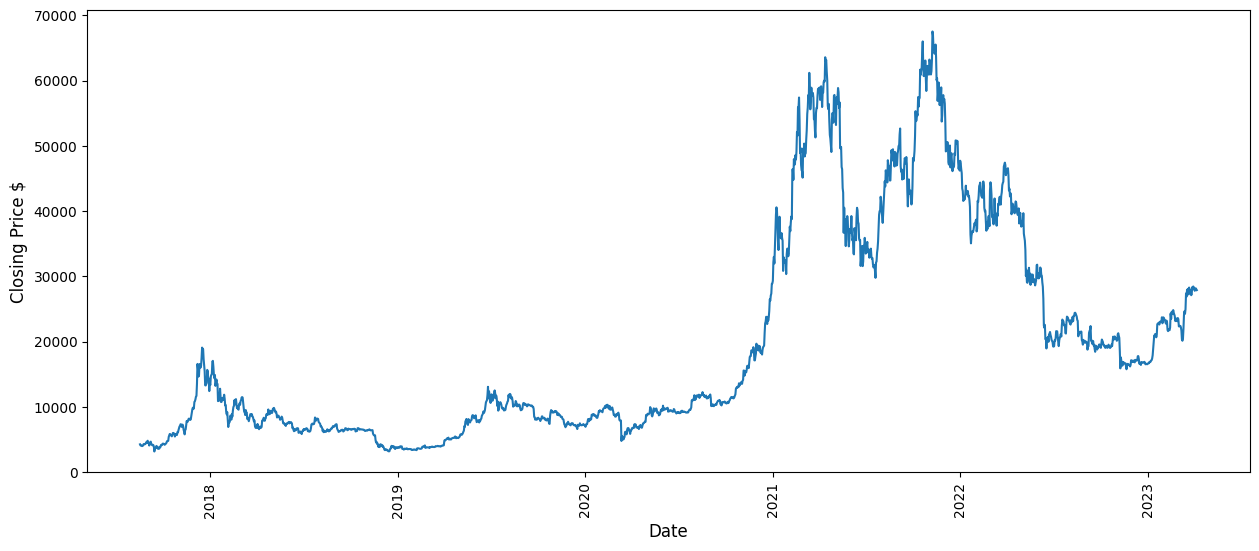

In [68]:
x = df['Date']
x=pd.to_datetime(x)
print(x)
# Put exchange rates on the y-axis
y = df['Close']
# y=y.iloc[:100].values
# print(df.iloc[:15])
# Specify the width and height of a figure in unit inches
fig = plt.figure(figsize=(15,6))
# Rotate the date ticks on the x-axis by degrees
plt.xticks(rotation=90)
# Set title on the axis
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price $', fontsize=12)
# Plot the data
plt.plot(x.values,y.values)
plt.show()

In [69]:
data=df.filter(['Close'])
dataset=np.asarray(data)
train_data_len= int(len(data)*.8)
test_data_len=len(data)-train_data_len
print(len(data),train_data_len,test_data_len)
# iloc[:, ::-1]
# print(df['Date'].iloc[::-1])
# print(np.min(data))

2059 1647 412


In [ ]:
# print(np.min(dataset), np.max(dataset))
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler(feature_range=(0,1))
# data_scaled=(dataset-np.min(dataset))/(np.max(dataset)-np.min(dataset))
# print(data_scaled)
# scaled_data=scaler.fit_transform(dataset)

# print(scaler.inverse_transform(data_scaled))
# def invers_transform(dataset):
#   dataset=(np.max(dataset)-np.min(dataset))*dataset + np.min(dataset)
#   return dataset
# inver_transformed=invers_transform(data_scaled)
# # print(dataset)
# # print(inver_transformed)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
print(scaled_data)
print(type(dataset))

[[0.38418613]
 [0.38616773]
 [0.38828456]
 ...
 [0.01478096]
 [0.01428964]
 [0.01703628]]
<class 'numpy.ndarray'>


In [71]:
train_data=scaled_data[test_data_len:,:]
test_data=scaled_data[:test_data_len,:]
print(train_data.shape)
def split_x_y(dataset):
  data_len=dataset.shape[0]
  print(data_len)
  X=[]
  y=[]
  for i in range(100,data_len):
    X.append(dataset[i-100:i,0])
    y.append(dataset[i,0])
    if i<=5:
      print(y)
      print()
      print(X)
      print()

  X=np.asarray(X).reshape((len(y),100,1))  
  return X,np.asarray(y)
# print(split_x_y(train_data))

X_train, y_train = split_x_y(train_data)
X_test, y_test = split_x_y(test_data)

print(X_train.shape, X_test.shape)

(1647, 1)
1647
412
(1547, 100, 1) (312, 100, 1)


In [72]:
#build LSTM model
from keras.layers import Dense,LSTM
from keras.models import Sequential
from keras.optimizers import Adam

model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(X_train.shape[1],1) ) )
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# optimizer=Adam(lr=0.001)
# mean_squared_error
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# def Tunining_hyperparamets(X_train,y_train,batch_size=32, epochs=20,lr=0.001,loss=loss)

In [47]:
model.fit(X_train,y_train,batch_size=32, epochs=20)
model.save("LSTM_binance1.h5")

Epoch 1/20
49/49 [==============================] - 10s 122ms/step - loss: 0.0070 - mae: 0.0445
Epoch 2/20
49/49 [==============================] - 6s 130ms/step - loss: 0.0011 - mae: 0.0187
Epoch 3/20
49/49 [==============================] - 6s 119ms/step - loss: 9.6714e-04 - mae: 0.0176
Epoch 4/20
49/49 [==============================] - 10s 201ms/step - loss: 8.7790e-04 - mae: 0.0170
Epoch 5/20
49/49 [==============================] - 9s 191ms/step - loss: 8.5261e-04 - mae: 0.0176
Epoch 6/20
49/49 [==============================] - 7s 139ms/step - loss: 9.4718e-04 - mae: 0.0186
Epoch 7/20
49/49 [==============================] - 7s 137ms/step - loss: 6.9171e-04 - mae: 0.0152
Epoch 8/20
49/49 [==============================] - 6s 126ms/step - loss: 7.6382e-04 - mae: 0.0162
Epoch 9/20
49/49 [==============================] - 7s 134ms/step - loss: 6.1044e-04 - mae: 0.0145
Epoch 10/20
49/49 [==============================] - 6s 118ms/step - loss: 5.5377e-04 - mae: 0.0142
Epoch 11/20
49/

In [74]:
# from keras.models import load_model
model=load_model('/content/LSTM_binance _rmse15.h5')
model.summary()

X_test,y_test=split_x_y(test_data)

y_pred=model.predict(X_test)
y_pred=scaler.inverse_transform(y_pred)
X_test,y_test=split_x_y(test_data)
y_test=y_test.reshape(y_test.shape[0],1)


y_test=scaler.inverse_transform(y_test)

#####root measn squred error #####
rmse=np.sqrt(np.mean(y_pred-y_test)**2)

print("Root-mean-square deviation = ",rmse)
print()
print(y_test[-1])
print(y_pred[-1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
412
10/10 [==============================] - 2s 29ms/step
412
Root-mean-square deviation =  15.732890875400722

[40079.17]
[38353.406]


(312,) (312, 1)


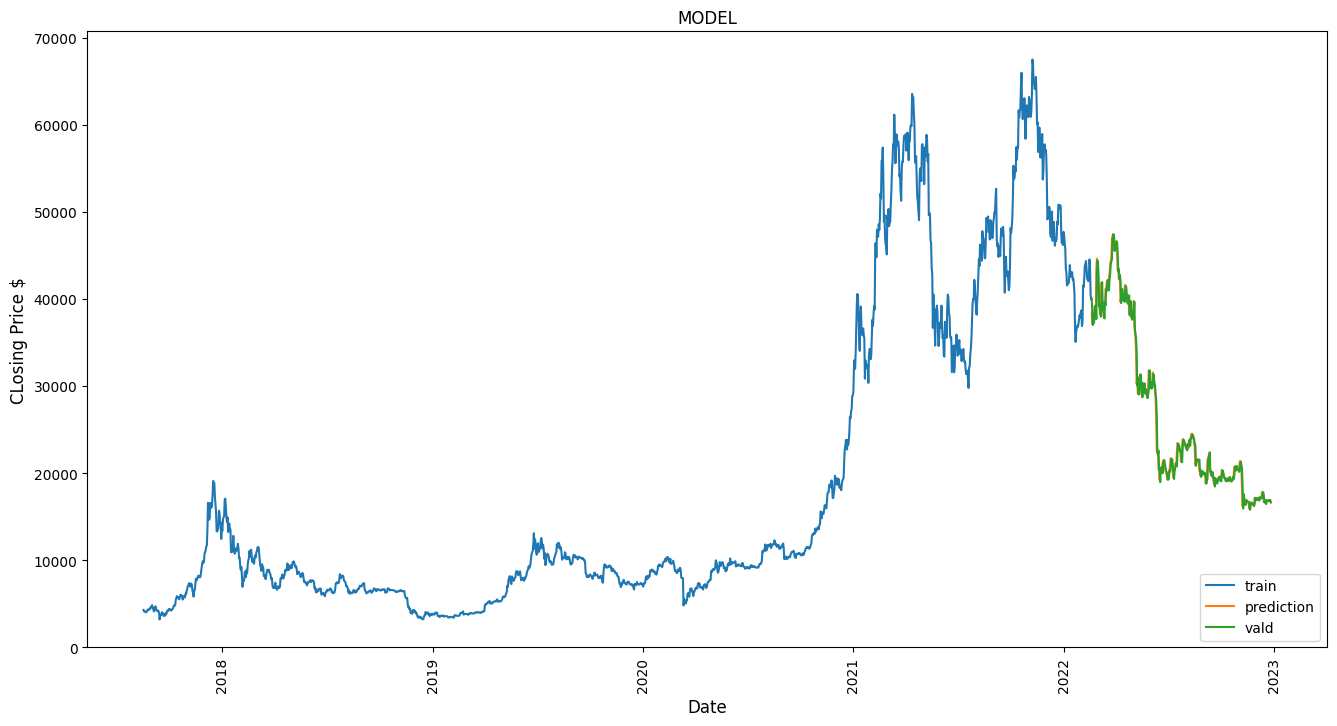

In [75]:
# print(train_data.shape)
# print(test_data.shape)
x=df['Date']
x=x.iloc[100:test_data_len]
print(x.shape,y_pred.shape)
close=df['Close']
close=close.iloc[test_data_len:]
date=df['Date'].iloc[test_data_len:]
plt.figure(figsize=(16,8))
plt.title("MODEL")
plt.xlabel('Date',fontsize=12)
plt.ylabel("CLosing Price $",fontsize=12)
# plt.plot(pd.to_datetime(df['Date']),df['Close'])
plt.plot(pd.to_datetime(date),close)
plt.plot(pd.to_datetime(x),y_pred)
plt.plot(pd.to_datetime(x),y_test)
plt.xticks(rotation=90)
plt.legend(['train','prediction','vald'], loc='lower right')